In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.interpolate import CubicSpline

In [179]:
df_ideal = pd.read_csv('../../simulation/ideal_case.csv')
df_ideal.head()

,x,y,z,theta
0,0.0,0.0,0.000000e+00,-1.570796
1,-1715.0,0.0,1.050135e-13,-1.570796
2,-3430.0,0.0,2.100269e-13,-1.570796
3,-5145.0,0.0,3.150404e-13,-1.570796
4,-6860.0,0.0,4.200539e-13,-1.570796


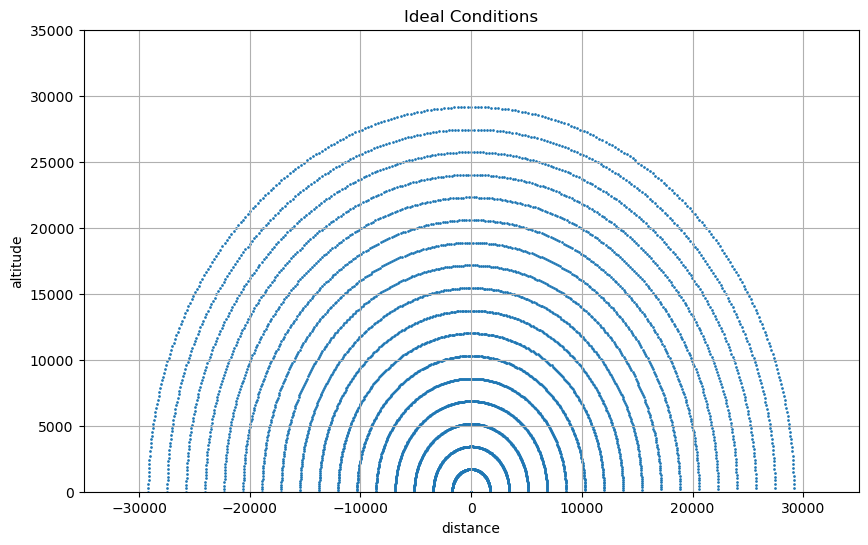

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(df_ideal['x'],df_ideal['z'], s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title("Ideal Conditions")
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [175]:
df_wTemp = pd.read_csv('../../simulation/in_py/wTemp.csv')
df_wTemp.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../simulation/in_py/wTemp.csv'

In [ ]:
df = df_wTemp
Gamma = 1.4
phi = 0
R_gas = 287.05
Troposphere_Lapse_Rate = -6.5
Tropopause_Height = 18000
Tropopause_Temperature = 216.65
Stratosphere_Lapse_Rate = 2.5
Stratopause_Height = 48000
Stratopause_Temperature = 265

def temperature(z):
    return np.where(z <= Tropopause_Height, 300 + (Troposphere_Lapse_Rate / 1000) * z,
                    np.where((z > Tropopause_Height) & (z <= Stratopause_Height), 
                             300 + (Troposphere_Lapse_Rate / 1000) * Tropopause_Height + (Stratosphere_Lapse_Rate / 1000) * (Tropopause_Height - z),
                             Stratopause_Temperature
                            )
                   )

def vel_c(z):
    return np.sqrt(Gamma * R_gas * temperature(z))

df['v_x'] = vel_c(df['z']) * np.sin(df['theta']) * np.cos(phi) 
df['v_y'] = vel_c(df['z']) * np.sin(df['theta']) * np.sin(phi)
df['v_z'] = vel_c(df['z']) * np.cos(df['theta'])


df['res_v'] =  np.sqrt(np.square(df['v_x'])+np.square(df['v_y'])+np.square(df['v_z']))  


plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("With Temperature Formualae")
plt.xlabel("distance")
plt.ylabel("altitude")
 
plt.grid(alpha=0.4)
plt.show()

In [ ]:
df = df_wTemp

plt.figure(figsize=(10,6))
sc = plt.scatter(df['x'], df['z'], c=df['res_v'], cmap='viridis', alpha=0.8, s=1)

cbar = plt.colorbar(sc)
cbar.set_label('velocity')

dist = 35 * 1000
plt.xlim((-dist,dist))
# plt.title("With Temperature Formualae")
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid(alpha=0.3)
plt.show()
# plt.savefig('withTemp.png')

In [21]:
df_wTemp_data = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_data.csv')
df_wTemp_data.head()

,x,y,z,theta
0,0.000000,0.000000e+00,0.000000,-1.570796
1,681.862194,-8.350404e-14,0.302800,-1.569020
2,1363.722774,-1.670079e-13,1.816799,-1.567244
3,2045.579589,-2.505112e-13,4.541989,-1.565467
4,2727.430487,-3.340139e-13,8.478352,-1.563691


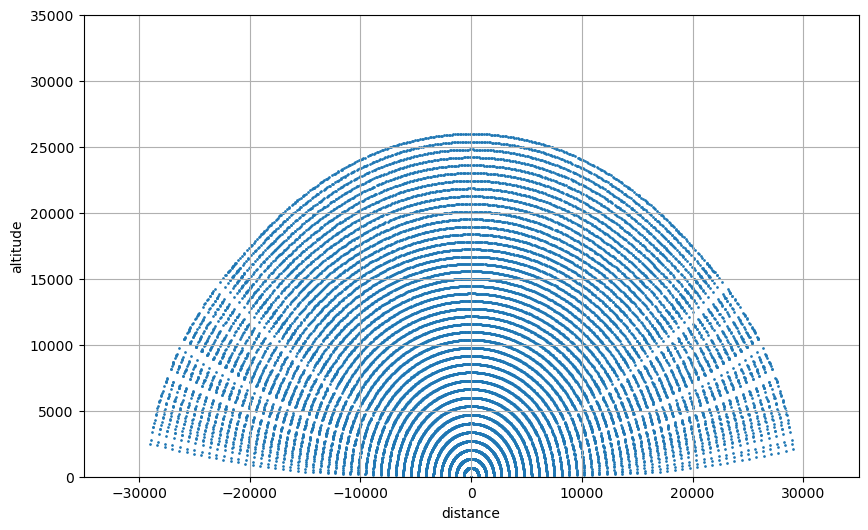

In [22]:
df = df_wTemp_data
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("With Temperature Formualae")
plt.xlabel("distance")
plt.ylabel("altitude")
 
plt.grid()
plt.show()

In [ ]:
df_wWind_data = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind_data.csv')
df_wWind_data.head()

In [ ]:
df = df_wWind_data
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'], s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("Ideal Conditions")
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [ ]:

# 

# 
# 

# df_wWind_cs = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind_cs.csv')
# 

In [ ]:
df_wtemp_cs = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_cs.csv')
df_wtemp_cs

In [ ]:
df = df_wtemp_cs
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("With Temperature Formualae")
plt.xlabel("distance")
plt.ylabel("altitude")
 
plt.grid()
plt.show()

In [ ]:
# df = df_wWind
# Gamma = 1.4
# phi = 0
# R_gas = 287.05
# Troposphere_Lapse_Rate = -6.5
# Tropopause_Height = 18000
# Tropopause_Temperature = 216.65
# Stratosphere_Lapse_Rate = 2.5
# Stratopause_Height = 48000
# Stratopause_Temperature = 265
# Ref_Wind_speed = 250.5;
# Ref_height = 28000;
# Alpha= 0.143;


# def temperature(z):
#     return np.where(z <= Tropopause_Height, 300 + (Troposphere_Lapse_Rate / 1000) * z,
#                     np.where((z > Tropopause_Height) & (z <= Stratopause_Height), 
#                              300 + (Troposphere_Lapse_Rate / 1000) * Tropopause_Height + (Stratosphere_Lapse_Rate / 1000) * (z - Tropopause_Height ),
#                              Stratopause_Temperature
#                             )
#                    )

# def vel_c(z):
#     return np.sqrt(Gamma * R_gas * temperature(z))

# def wind_speed(z):
#     return np.where(z<= Ref_height, Ref_Wind_speed * np.power(z/Ref_height, Alpha), Ref_Wind_speed)    

# df['v_x'] = vel_c(df['z']) * np.sin(df['theta']) * np.cos(phi) + wind_speed(z)
# df['v_y'] = vel_c(df['z']) * np.sin(df['theta']) * np.sin(phi)
# df['v_z'] = vel_c(df['z']) * np.cos(df['theta'])


# df['res_v'] =  np.sqrt(np.square(df['v_x'])+np.square(df['v_y'])+np.square(df['v_z']))  

In [ ]:
# df = df_ideal
# phi =0;

# def vel_c(z):
#     return 343;

# df['v_x'] = vel_c(df['z']) * np.sin(df['theta']) * np.cos(phi) 
# df['v_y'] = vel_c(df['z']) * np.sin(df['theta']) * np.sin(phi)
# df['v_z'] = vel_c(df['z']) * np.cos(df['theta'])


# df['res_v'] =  np.sqrt(np.square(df['v_x'])+np.square(df['v_y'])+np.square(df['v_z']))  

In [ ]:
# df = df_ideal
# sc = plt.scatter(df['x'], df['z'], c=df['res_v'], cmap='viridis', alpha=0.8)

# cbar = plt.colorbar(sc)
# cbar.set_label('velocity')

# dist = 35 * 1000
# plt.xlim((-dist,dist))
# plt.ylim((0,dist))
# plt.title("altitude v/s  distance")
# plt.xlabel("distance")
# plt.ylabel("altitude")

# plt.show()
# # plt.savefig("ideal_conditions.png")

In [ ]:

# plt.savefig("ideal_conditions.png")

In [ ]:
# df = df_wtemp_cs

# plt.figure(figsize=(10, 6))
# plt.scatter(df['x'],df['z'])

# dist = 35 * 1000
# plt.xlim((-dist,dist))
# plt.ylim((0,dist))
# plt.title("altitude v/s  distance")
# plt.xlabel("distance")
# plt.ylabel("altitude")
 
# plt.grid()
# plt.show()

In [ ]:
# df = df_wWind
# sc = plt.scatter(df['x'], df['z'], c=df['res_v'], cmap='viridis', alpha=0.8)

# cbar = plt.colorbar(sc)
# cbar.set_label('velocity')

# dist = 35 * 1000
# plt.xlim((-dist,dist))
# plt.title("altitude v/s  distance")
# plt.xlabel("distance")
# plt.ylabel("altitude")
 
# plt.show()
# # plt.savefig('withWind.png')

In [ ]:
# df = df_wWind

# plt.figure(figsize=(10, 6))
# plt.scatter(df['x'],df['z'])

# dist = 35 * 1000
# plt.xlim((-dist,dist))
# plt.ylim((0,dist))
# plt.title("altitude v/s  distance //wind data cos")
# plt.xlabel("distance")
# plt.ylabel("altitude")

# plt.grid()
# plt.show()
# # plt.savefig("ideal_conditions.png")

In [ ]:
# df = df_wWind_cs

# plt.figure(figsize=(10, 6))
# plt.scatter(df['x'],df['z'])

# dist = 35 * 1000
# plt.xlim((-dist,dist))
# plt.ylim((0,dist))
# plt.title("altitude v/s  distance //wind data cos")
# plt.xlabel("distance")
# plt.ylabel("altitude")

# plt.grid()
# plt.show()

In [ ]:
# df['theta'] == -1.57080

In [ ]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/ideal_case_data.csv')
df

In [ ]:
ax = plt.axes(projection ='3d')

z = df['z']
x = df['x']
y = df['y']

ax.scatter3D(x, y, z, s=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [9]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind.csv')
df

,x,y,z,theta,time
0,0.000000e+00,0.000000e+00,0.000000,-1.570796,0.0
1,8.882798e+00,-5.375695e+02,59.053217,-1.348316,1.5
2,1.387403e+01,-1.035680e+03,211.258642,-1.205034,3.0
3,1.658099e+01,-1.497337e+03,410.766182,-1.145715,4.5
4,2.098884e+01,-1.945603e+03,623.893769,-1.137308,6.0
...,...,...,...,...,...
22745,3.722430e+06,-1.316866e+07,-11124.398022,1471.228818,90.0
22746,3.811288e+06,-1.348293e+07,-11077.089678,1498.934073,91.5
22747,3.902382e+06,-1.380495e+07,-11269.958931,1562.970658,93.0
22748,3.997156e+06,-1.414058e+07,-11411.989003,1613.253017,94.5


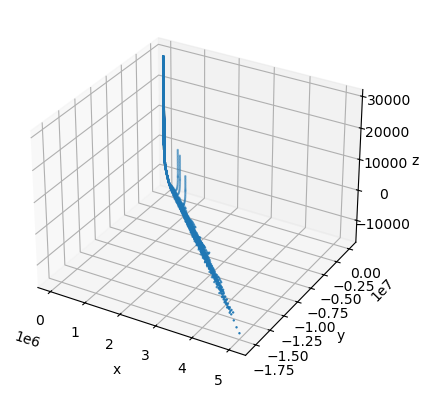

<Figure size 1000x800 with 0 Axes>

In [10]:
ax = plt.axes(projection ='3d')

fig = plt.figure(figsize=(10, 8))

z = df['z']
x = df['x']
y = df['y']

ax.scatter3D(x, y, z, s=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [ ]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind_data.csv')
df

In [ ]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection ='3d')

z = df['z']
x = df['x']
y = df['y']

ax.scatter3D(x, y, z, s=0.5)
ax.set_xlabel('N-S')
ax.set_ylabel('W-E')
ax.set_zlabel('Height')

plt.show() #0

In [ ]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection ='3d')

z = df['z']
x = df['x']
y = df['y']

ax.scatter3D(x, y, z, s=0.5)
ax.set_xlabel('N-S')
ax.set_ylabel('W-E')
ax.set_zlabel('Height')

plt.show()  #45

In [ ]:
ax = plt.axes(projection ='3d')

z = df['z']
x = df['x']
y = df['y']

ax.scatter3D(x, y, z, s=0.5)
ax.set_xlabel('N-S')
ax.set_ylabel('W-E')
ax.set_zlabel('Height')

plt.show() # 90

In [ ]:
ax = plt.axes(projection ='3d')

z = df['z']
x = df['x']
y = df['y']

ax.scatter3D(x, y, z, s=0.5)
ax.set_xlabel('N-S')
ax.set_ylabel('W-E')
ax.set_zlabel('Height')

plt.show() #90 , y

In [ ]:
ax = plt.axes(projection ='3d')

z = df['z']
x = df['x']
y = df['y']

ax.scatter3D(x, y, z, s=0.5)
ax.set_xlabel('N-S')
ax.set_ylabel('W-E')
ax.set_zlabel('Height')

plt.show() #0,y

In [5]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind_data.csv')
df

,x,y,z,theta,time
0,0.000000,0.000000,0.000000,-1.570796,0.0
1,-340.089285,-8.655798,0.147189,-1.569931,1.0
2,-680.178315,-17.311595,0.588757,-1.569065,2.0
3,-1020.266835,-25.967393,1.324702,-1.568200,3.0
4,-1360.354591,-34.623190,2.355024,-1.567334,4.0
...,...,...,...,...,...
43995,28061.031778,-651.895677,1825.642245,1.414182,83.0
43996,28393.122566,-653.862075,1878.357325,1.412413,84.0
43997,28724.981271,-655.561373,1931.791953,1.409888,85.0
43998,29056.568119,-657.162924,1986.041974,1.407363,86.0


In [6]:
df['time'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87.])

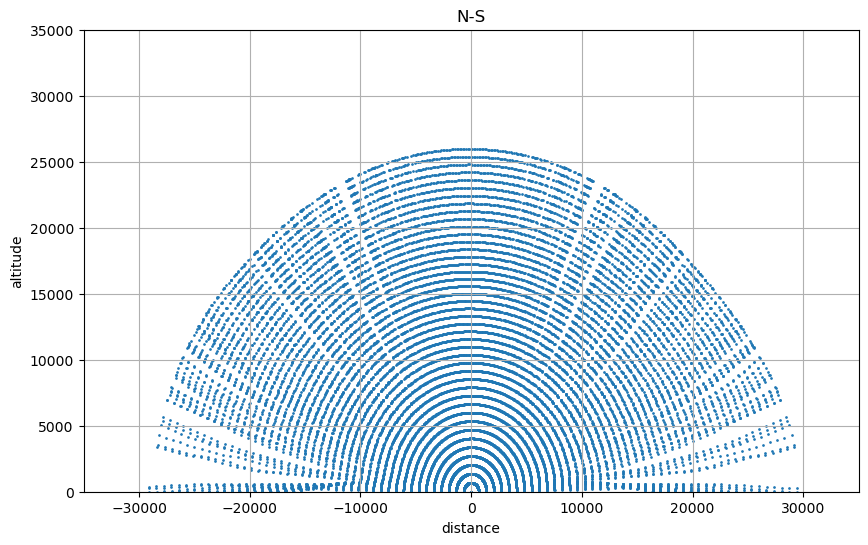

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
plt.title('N-S')
plt.grid()
plt.show()

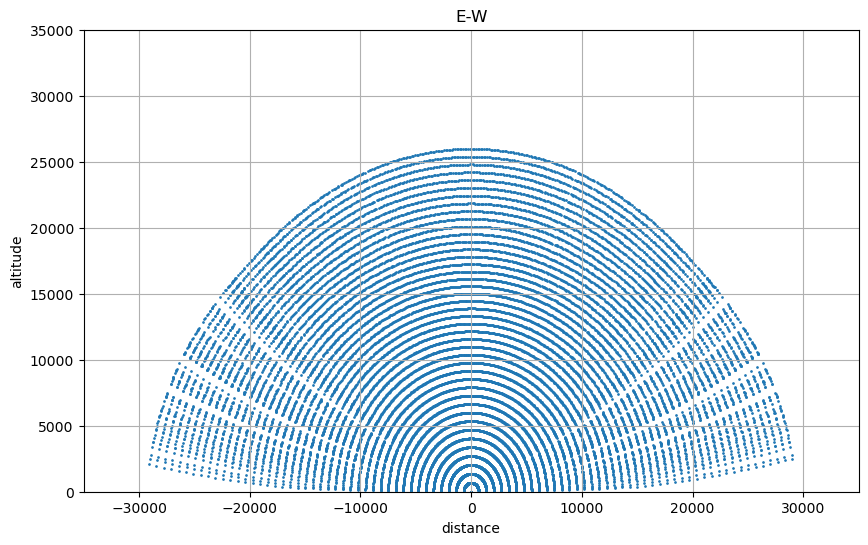

In [67]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind_data.csv')
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
plt.title('E-W')
plt.grid()
plt.show()

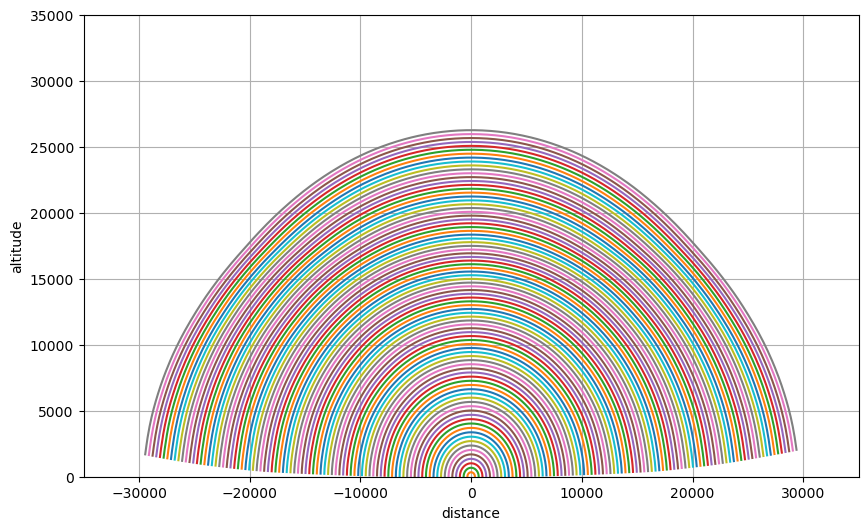

In [8]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind_data.csv')
group_t = df.groupby('time')

t_val = df['time'].unique()
plt.figure(figsize=(10, 6))
for t in t_val:
    plt.plot(group_t.get_group(t)['x'],group_t.get_group(t)['z'])

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
# plt.title('E-W')
plt.grid()
plt.show()

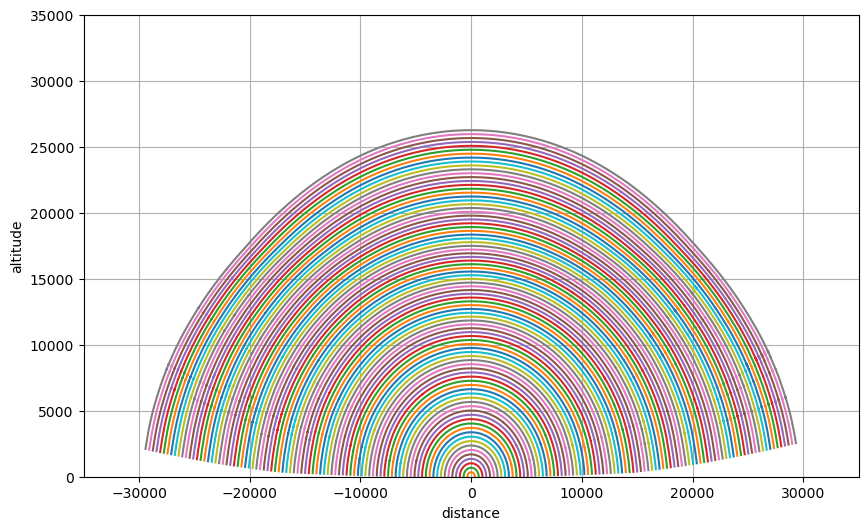

In [9]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_data.csv')
group_t = df.groupby('time')

t_val = df['time'].unique()
plt.figure(figsize=(10, 6))
for t in t_val:
    plt.plot(group_t.get_group(t)['x'],group_t.get_group(t)['z'])

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
# plt.title('E-W')
plt.grid()
plt.show()

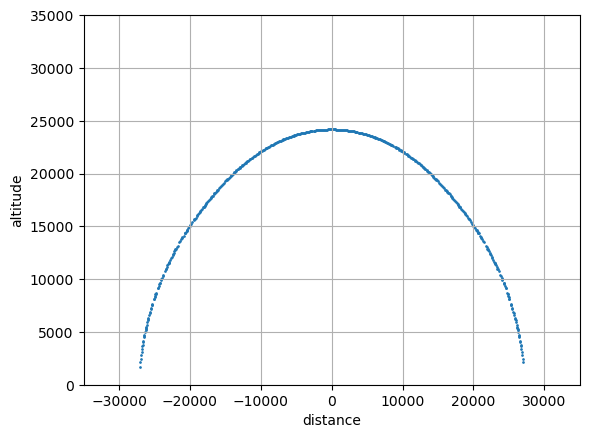

In [11]:
t =80

plt.scatter(group_t.get_group(t)['x'],group_t.get_group(t)['z'], s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
# plt.title('E-W')
plt.grid()
plt.show()

In [127]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_data.csv')
group_t = df.groupby('time')
# df_t = group_t.get_group(10).reset_index(drop=True)
# df_t.sort_values('x')
group_t.get_group(10).sort_values('x')
# group_t.get_group(10)

,x,y,z,theta,time
10,-3409.266595,0.0,15.139813,-1.561915,10.0
98,-3409.104181,0.0,36.559847,-1.555632,10.0
186,-3408.807199,0.0,57.977840,-1.549350,10.0
274,-3408.375673,0.0,79.392947,-1.543068,10.0
362,-3407.809631,0.0,100.804323,-1.536786,10.0
...,...,...,...,...,...
43570,3407.109107,0.0,122.211123,1.530505,10.0
43658,3407.809631,0.0,100.804323,1.536786,10.0
43746,3408.375673,0.0,79.392947,1.543068,10.0
43834,3408.807199,0.0,57.977840,1.549350,10.0


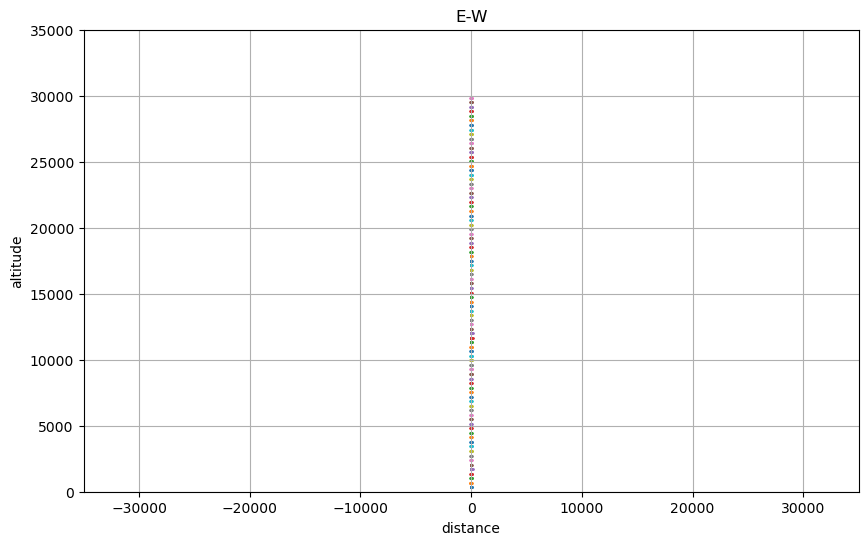

In [183]:
plt.figure(figsize=(10, 6))

df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/ideal_case_data.csv')
group_t = df.groupby('time')

for t in df['time'].unique():
    if t!=0:
        df_cs = group_t.get_group(t).sort_values('x')
        wave_eq = CubicSpline(df_cs['x'],df_cs['z'], bc_type='natural')
        x_val = []
        for i in df_cs['x']:
            dz_dx =  wave_eq.derivative()(i)
            noral = -1/dz_dx
            x_b = i - wave_eq(i)/noral  
            if np.abs(x_b) <= 130:
                x_val.append(x_b)
        plt.scatter(x_val,wave_eq(x_val), s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
plt.title('E-W')
plt.grid()
plt.show()

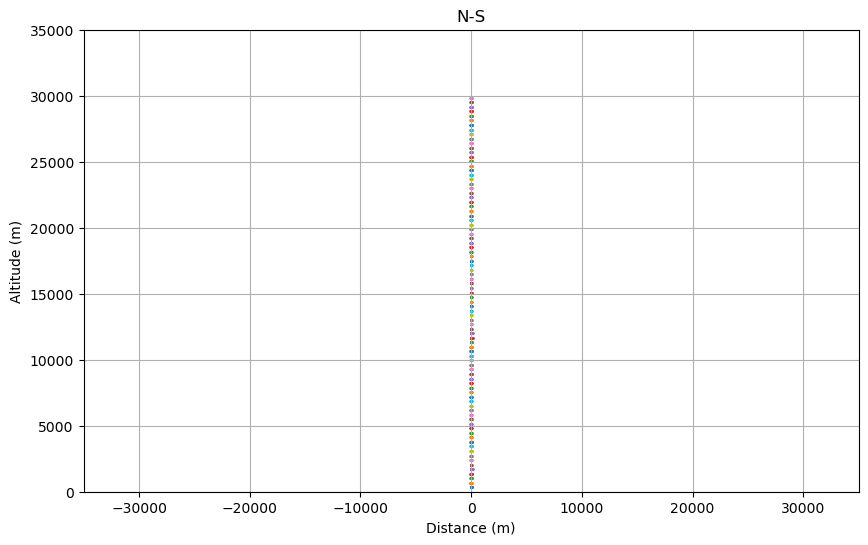

In [174]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/ideal_case_data.csv')
group_t = df.groupby('time')

plt.figure(figsize=(10, 6))
for t in df['time'].unique():
    if t != 0:
        df_cs = group_t.get_group(t).sort_values('x')

        wave_eq = CubicSpline(df_cs['x'], df_cs['z'], bc_type='natural')
        x_val = []
        for i in df_cs['x']:
            dz_dx = wave_eq.derivative()(i)
            if dz_dx != 0:
                normal_slope = -1 / dz_dx
            else:
                continue
            x_b = i - wave_eq(i) / normal_slope
            if np.abs(x_b) <= 130:
                x_val.append(x_b)
        plt.scatter(x_val, wave_eq(x_val), s=1)

dist = 35 * 1000
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel("Distance (m)")
plt.ylabel("Altitude (m)")
plt.title('N-S')
plt.grid()
plt.show()